In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from skimage import feature
from imutils import paths
import numpy as np
import cv2
import os
import pickle
import random
import matplotlib.pyplot as plt

In [2]:
def quantify_image(image):
    features = feature.hog(image, orientations=9,
                           pixels_per_cell=(10, 10), cells_per_block=(2, 2),
                           transform_sqrt=True, block_norm="L1")
    return features

In [3]:
def load_split(path):
    print(path)
    imagePaths = list(paths.list_images(path))
    print(imagePaths)
    data = []
    labels = []
    for imagePath in imagePaths:
        label = imagePath.split(os.path.sep)[-2]
        image = cv2.imread(imagePath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (200, 200))
        image = cv2.threshold(image, 0, 255,
                              cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        features = quantify_image(image)
        data.append(features)
        labels.append(label)
    return (np.array(data), np.array(labels))


In [4]:
def train_model(dataset):
    print(dataset)
    path = "D:\studymate\MCA\sem 3\Extenship\ParkinsonDetection\dataset\\" + dataset
    trainingPath = os.path.sep.join([path, "training"])
    testingPath = os.path.sep.join([path, "testing"])
    print(trainingPath)
    # load the data
    (trainX, trainY) = load_split(trainingPath)
    (testX, testY) = load_split(testingPath)
    # encode the labels
    le = LabelEncoder()
    trainY = le.fit_transform(trainY)
    testY = le.transform(testY)
    model=RandomForestClassifier(n_estimators=100)
    model=model.fit(trainX, trainY)
    pickle.dump(model,open('parkPredict.pkl','wb'))
    predictions = model.predict(testX)
    cm = confusion_matrix(testY, predictions).ravel()
    tn, fp, fn, tp = cm
    accuracy = (tp + tn) / float(cm.sum())
    sensitivity= tp / float(tp + fn)
    specificity = tn / float(tn + fp)
    print(accuracy)
    print(sensitivity)
    print(specificity)
    return model

In [5]:
def test_prediction(model, testingPath):
    testingPaths = list(paths.list_images(testingPath))
    output_images = []
    for _ in range(15):
        image = cv2.imread(random.choice(testingPaths))
        output = image.copy()
        output = cv2.resize(output, (128, 128))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (200, 200))
        image = cv2.threshold(image, 0, 255,
                              cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        features = quantify_image(image)
        preds = model.predict([features])
        label = "Parkinsons" if preds[0] else "Healthy"

        color = (0, 255, 0) if label == "Healthy" else (0, 0, 255)
        cv2.putText(output, label, (3, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                    color, 2)
        output_images.append(output)
    plt.figure(figsize=(20, 20))
    for i in range(len(output_images)):
        plt.subplot(5, 5, i+1)
        plt.imshow(output_images[i])
        plt.axis("off")
    plt.show()

spiral
D:\studymate\MCA\sem 3\Extenship\ParkinsonDetection\dataset\spiral\training
D:\studymate\MCA\sem 3\Extenship\ParkinsonDetection\dataset\spiral\training
['D:\\studymate\\MCA\\sem 3\\Extenship\\ParkinsonDetection\\dataset\\spiral\\training\\healthy\\V01HE02.png', 'D:\\studymate\\MCA\\sem 3\\Extenship\\ParkinsonDetection\\dataset\\spiral\\training\\healthy\\V01HE03.png', 'D:\\studymate\\MCA\\sem 3\\Extenship\\ParkinsonDetection\\dataset\\spiral\\training\\healthy\\V02HE02.png', 'D:\\studymate\\MCA\\sem 3\\Extenship\\ParkinsonDetection\\dataset\\spiral\\training\\healthy\\V02HE03.png', 'D:\\studymate\\MCA\\sem 3\\Extenship\\ParkinsonDetection\\dataset\\spiral\\training\\healthy\\V03HE2.png', 'D:\\studymate\\MCA\\sem 3\\Extenship\\ParkinsonDetection\\dataset\\spiral\\training\\healthy\\V03HE3.png', 'D:\\studymate\\MCA\\sem 3\\Extenship\\ParkinsonDetection\\dataset\\spiral\\training\\healthy\\V04HE02.png', 'D:\\studymate\\MCA\\sem 3\\Extenship\\ParkinsonDetection\\dataset\\spiral\\tra

0.8666666666666667
0.8666666666666667
0.8666666666666667
D:\studymate\MCA\sem 3\Extenship\ParkinsonDetection\dataset\spiral\testing


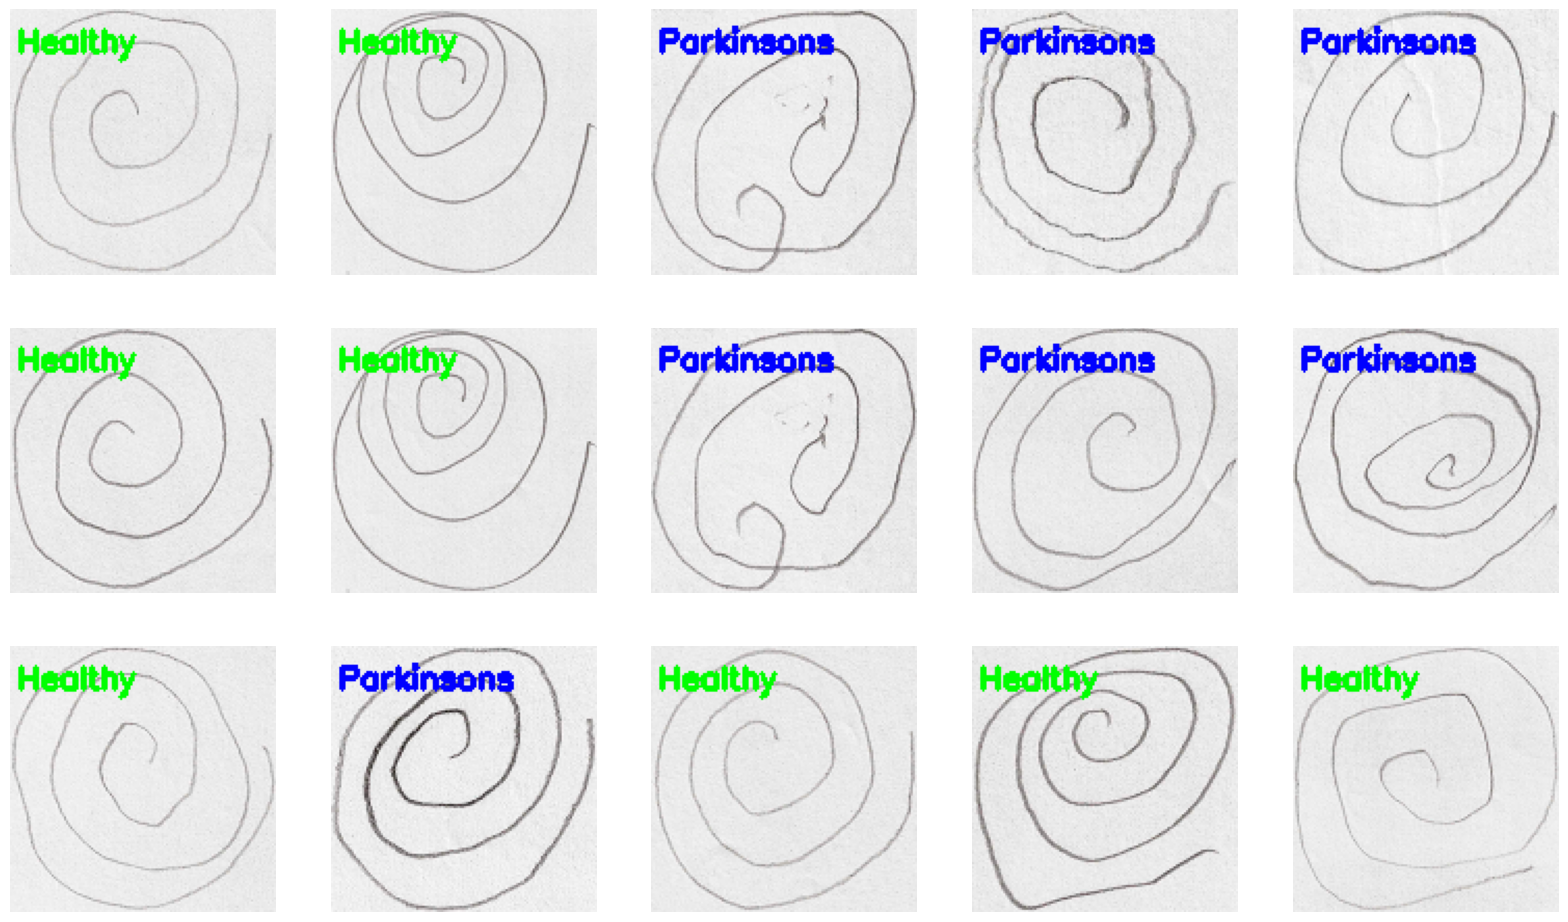

In [6]:
spiralModels = train_model('spiral')
testingPath = os.path.sep.join(["D:\studymate\MCA\sem 3\Extenship\ParkinsonDetection\dataset\spiral", "testing"])
print(testingPath)
test_prediction(spiralModels, testingPath)